In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
#reading the CSV file again using the 'latin1' encoding
file_path = "online_retail.csv"
df = pd.read_csv(file_path, encoding='latin1')

In [8]:
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/10 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/10 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/10 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/10 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/10 8:26,3.39,17850.0,United Kingdom


In [12]:
df.shape

(541910, 8)

In [9]:
df.describe()

,Quantity,Price,Customer ID
count,541910.000000,541910.000000,406830.000000
mean,9.552234,4.611138,15287.684160
std,218.080957,96.759765,1713.603074
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [10]:
df.columns

Index(['Invoice', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'Price', 'Customer ID', 'Country'],
      dtype='object')

In [13]:

# We'll find the number and percentage of missing values for each column

missing_data = df.isnull().sum()
missing_percentage = (missing_data / len(online_retail_data_latin1)) * 100

# Combine the missing data count and percentage into a DataFrame for clear visualization
missing_summary = pd.DataFrame({"Missing Values": missing_data, "Percentage": missing_percentage})

missing_summary


,Missing Values,Percentage
Invoice,0,0.000000
StockCode,0,0.000000
Description,1454,0.268310
Quantity,0,0.000000
InvoiceDate,0,0.000000
Price,0,0.000000
Customer ID,135080,24.926648
Country,0,0.000000


### Data Cleaning

In [14]:
# Remove rows with missing descriptions
online_retail_data_clean = df.dropna(subset=['Description'])

# Check for duplicates and remove them
online_retail_data_clean = online_retail_data_clean.drop_duplicates()

# Convert InvoiceDate to datetime format
online_retail_data_clean['InvoiceDate'] = pd.to_datetime(online_retail_data_clean['InvoiceDate'])


### Feature Engineering

In [17]:
# Calculate the total amount for each transaction
online_retail_data_clean['TotalAmount'] = online_retail_data_clean['Quantity'] * online_retail_data_clean['Price']
online_retail_data_clean['TotalAmount'].head()

0    15.30
1    20.34
2    22.00
3    20.34
4    20.34
Name: TotalAmount, dtype: float64

## EDA

In [19]:
# Summary statistics for numerical columns
summary_statistics = online_retail_data_clean.describe()
summary_statistics

,Quantity,Price,Customer ID,TotalAmount
count,535188.000000,535188.000000,401605.000000,535188.000000
mean,9.671577,4.645267,15281.154341,18.173100
std,219.058852,97.364721,1714.008869,381.171468
min,-80995.000000,-11062.060000,12346.000000,-168469.600000
25%,1.000000,1.250000,13939.000000,3.750000
50%,3.000000,2.080000,15145.000000,9.900000
75%,10.000000,4.130000,16784.000000,17.400000
max,80995.000000,38970.000000,18287.000000,168469.600000


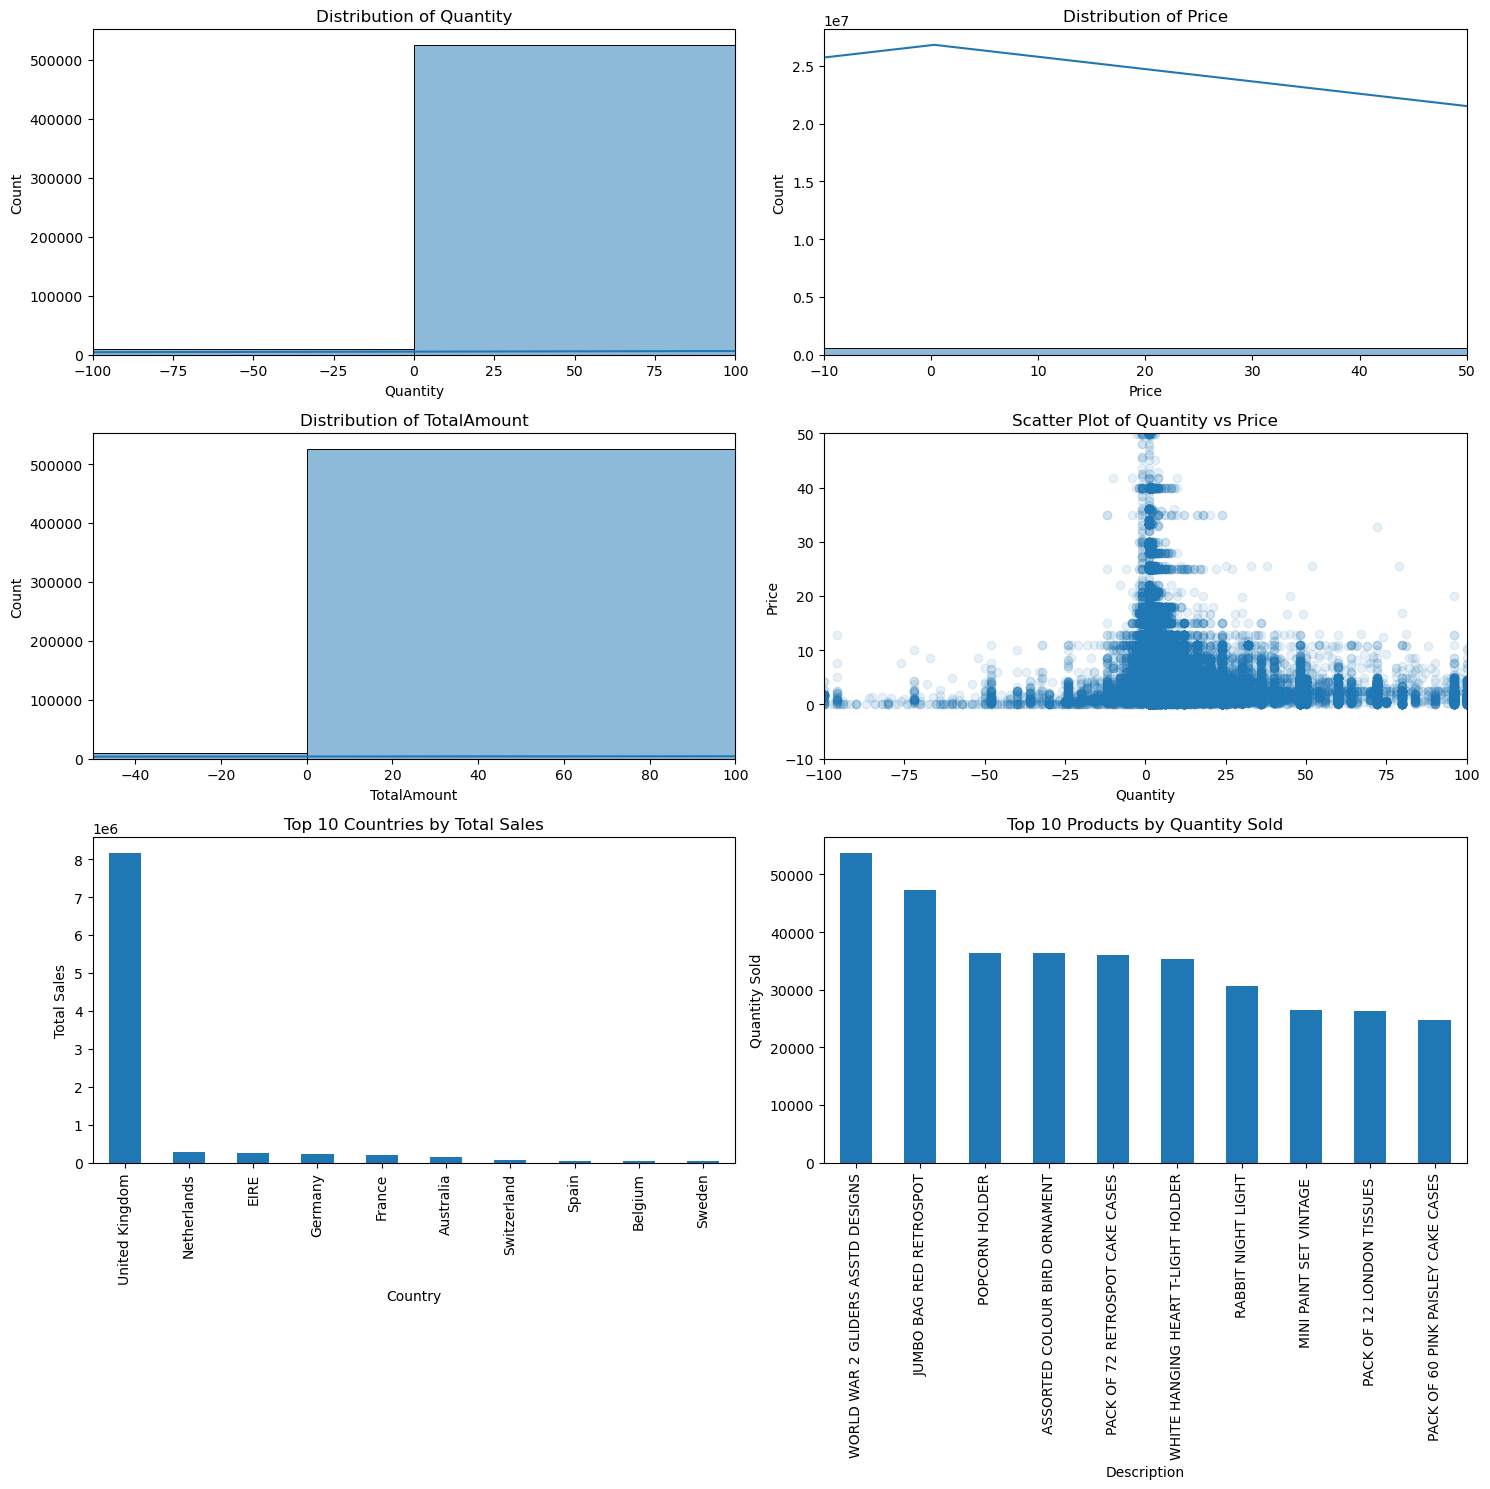

In [22]:
# Importing visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the plotting layout
fig, axes = plt.subplots(3, 2, figsize=(15, 15))

# Histograms for Quantity, Price, and TotalAmount
sns.histplot(online_retail_data_clean['Quantity'], bins=50, ax=axes[0, 0], kde=True)
axes[0, 0].set_title('Distribution of Quantity')
axes[0, 0].set_xlim(-100, 100)  # Limiting the x-axis to focus on common values

sns.histplot(online_retail_data_clean['Price'], bins=50, ax=axes[0, 1], kde=True)
axes[0, 1].set_title('Distribution of Price')
axes[0, 1].set_xlim(-10, 50)  # Limiting the x-axis to focus on common values

sns.histplot(online_retail_data_clean['TotalAmount'], bins=50, ax=axes[1, 0], kde=True)
axes[1, 0].set_title('Distribution of TotalAmount')
axes[1, 0].set_xlim(-50, 100)  # Limiting the x-axis to focus on common values

# Scatter plot to show the relationship between Quantity and Price
axes[1, 1].scatter(online_retail_data_clean['Quantity'], online_retail_data_clean['Price'], alpha=0.1)
axes[1, 1].set_title('Scatter Plot of Quantity vs Price')
axes[1, 1].set_xlabel('Quantity')
axes[1, 1].set_ylabel('Price')
axes[1, 1].set_xlim(-100, 100)  # Limiting the x-axis to focus on common values
axes[1, 1].set_ylim(-10, 50)   # Limiting the y-axis to focus on common values

# Analyzing the top 10 countries by total sales
top_countries = online_retail_data_clean.groupby('Country')['TotalAmount'].sum().sort_values(ascending=False).head(10)
top_countries.plot(kind='bar', ax=axes[2, 0])
axes[2, 0].set_title('Top 10 Countries by Total Sales')
axes[2, 0].set_ylabel('Total Sales')

# Analyzing the top 10 products by quantity sold
top_products = online_retail_data_clean.groupby('Description')['Quantity'].sum().sort_values(ascending=False).head(10)
top_products.plot(kind='bar', ax=axes[2, 1])
axes[2, 1].set_title('Top 10 Products by Quantity Sold')
axes[2, 1].set_ylabel('Quantity Sold')

plt.tight_layout()
plt.show()



### Summary and Insights:
The data shows a wide range of quantities and prices, with most transactions involving small quantities of lower-priced items.

There are anomalies such as negative values that may represent special transactions like returns.

The UK is the primary market, and understanding the preferences and behavior of customers in this region could be key.

The top products give insights into customer preferences and can guide inventory and marketing strategies.

## Customer segmentation involves dividing customers into groups based on common characteristics. A common approach in e-commerce is RFM (Recency, Frequency, Monetary) analysis, where customers are segmented based on:

Recency: How recently a customer made a purchase.

Frequency: How often a customer makes a purchase.

Monetary: How much money a customer spends on purchases.

RFM Analysis
We'll calculate the RFM values for each customer and then apply clustering to segment the customers into meaningful groups.

In [23]:
# Step 3.1.1: Calculating RFM Values

# Reference date to calculate recency (one day after the last invoice date in the dataset)
reference_date = online_retail_data_clean['InvoiceDate'].max() + pd.Timedelta(days=1)

# Calculating Recency, Frequency, and Monetary values for each customer
rfm_data = online_retail_data_clean.groupby('Customer ID').agg({
    'InvoiceDate': lambda x: (reference_date - x.max()).days, # Recency: days since last purchase
    'Invoice': 'nunique', # Frequency: number of unique purchases
    'TotalAmount': 'sum'  # Monetary: total amount spent
}).reset_index()

# Renaming columns
rfm_data.columns = ['Customer ID', 'Recency', 'Frequency', 'Monetary']

# Removing negative Monetary values (if any)
rfm_data = rfm_data[rfm_data['Monetary'] > 0]

# Summary of RFM values
rfm_data.describe()


,Customer ID,Recency,Frequency,Monetary
count,4322.000000,4322.000000,4322.000000,4.322000e+03
mean,15298.534475,90.343591,5.115687,1.918502e+03
std,1721.534033,99.133565,9.384459,8.262489e+03
min,12347.000000,1.000000,1.000000,1.776357e-15
25%,13812.250000,17.000000,1.000000,3.005975e+02
50%,15297.500000,49.500000,3.000000,6.533250e+02
75%,16777.750000,138.000000,6.000000,1.624118e+03
max,18287.000000,374.000000,248.000000,2.794890e+05


## The RFM values for each customer have been calculated:

Recency: The average recency is around 90 days, with a range from 1 to 374 days. Some customers have made purchases very recently, while others have not made purchases for over a year.

Frequency: The average frequency is around 5, with a range from 1 to 248. Most customers have made a few purchases, but some have made many more.

Monetary: The average monetary value is around £1,918.50, with a wide range from near £0 to £279,489. This represents the total amount spent by customers.

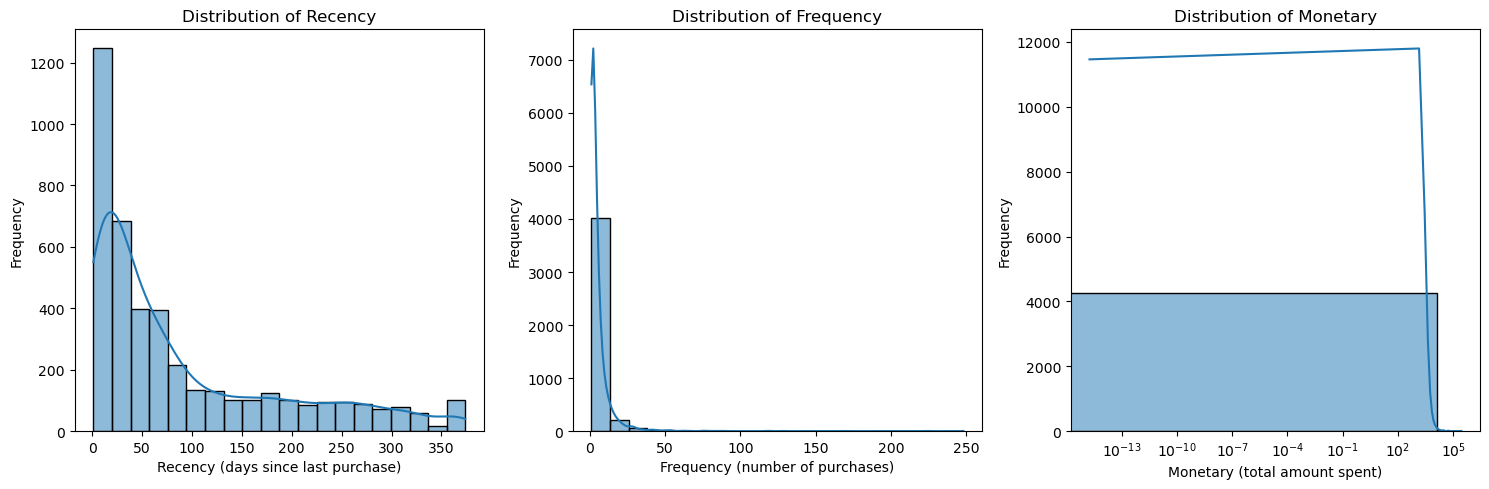

In [24]:
#Visualizing RFM Distributions

# Set up the plotting layout
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Histogram for Recency
sns.histplot(rfm_data['Recency'], bins=20, ax=axes[0], kde=True)
axes[0].set_title('Distribution of Recency')
axes[0].set_xlabel('Recency (days since last purchase)')
axes[0].set_ylabel('Frequency')

# Histogram for Frequency
sns.histplot(rfm_data['Frequency'], bins=20, ax=axes[1], kde=True)
axes[1].set_title('Distribution of Frequency')
axes[1].set_xlabel('Frequency (number of purchases)')
axes[1].set_ylabel('Frequency')

# Histogram for Monetary
sns.histplot(rfm_data['Monetary'], bins=20, ax=axes[2], kde=True)
axes[2].set_title('Distribution of Monetary')
axes[2].set_xlabel('Monetary (total amount spent)')
axes[2].set_ylabel('Frequency')

# Adjusting the x-axis scale for Monetary to focus on common values
axes[2].set_xscale('log')

plt.tight_layout()
plt.show()

Distribution of Recency: The distribution shows that many customers have made purchases quite recently, with a peak at the lower end of the range. There is also a long tail, indicating that some customers have not made purchases for a significant amount of time.

Distribution of Frequency: The frequency histogram shows that most customers have made only a few purchases. There is a long tail, representing customers who have made many more purchases.

Distribution of Monetary: The monetary histogram (with a logarithmic scale) reveals that most customers have spent lower amounts, with a long tail for higher spenders.

## Clustering

### Scaling

In [25]:
# Step 3.1.3.1: Scaling the RFM Values

from sklearn.preprocessing import StandardScaler

# Selecting the RFM values
rfm_values = rfm_data[['Recency', 'Frequency', 'Monetary']]

# Scaling the RFM values
scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm_values)

# Summary of the scaled RFM values
pd.DataFrame(rfm_scaled, columns=['Recency', 'Frequency', 'Monetary']).describe()


,Recency,Frequency,Monetary
count,4.322000e+03,4.322000e+03,4.322000e+03
mean,-3.711875e-17,1.540300e-16,-2.968055e-17
std,1.000116e+00,1.000116e+00,1.000116e+00
min,-9.013489e-01,-4.386149e-01,-2.322211e-01
25%,-7.399318e-01,-4.386149e-01,-1.958359e-01
50%,-4.120533e-01,-2.254719e-01,-1.531407e-01
75%,4.807849e-01,9.424253e-02,-3.563318e-02
max,2.861687e+00,2.588454e+01,3.359794e+01


### Elbow method to find the optimal number of clusters

In [27]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

C:\Users\lapde\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\lapde\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\lapde\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\lapde\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of

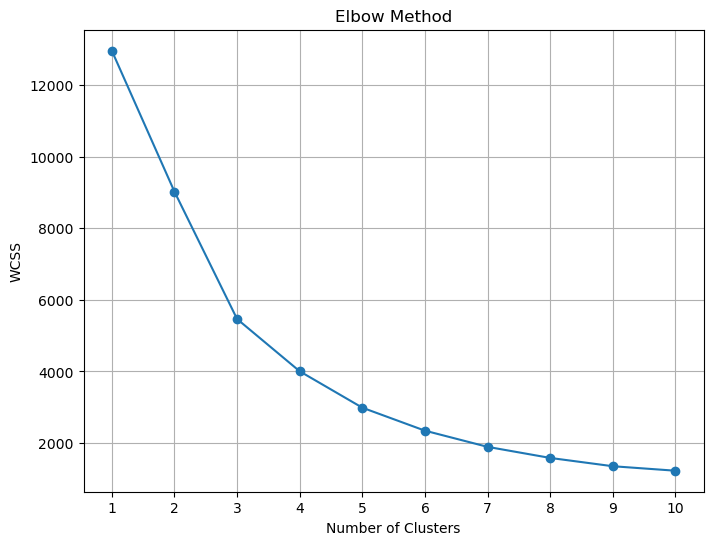

In [28]:
# Elbow Method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(rfm_scaled)
    wcss.append(kmeans.inertia_)

# Plotting the Elbow Method
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.xticks(range(1, 11))
plt.grid(True)
plt.show()

In [29]:
# k = 3

## Fitting K-means Clustering

In [30]:
# Fitting K-means Clustering with k=3 clusters
kmeans = KMeans(n_clusters=3, init='k-means++', random_state=42)
clusters = kmeans.fit_predict(rfm_scaled)

# Adding cluster labels to the RFM data
rfm_data['Cluster'] = clusters

# Summary statistics for each cluster
cluster_summary = rfm_data.groupby('Cluster').agg({
    'Recency': ['mean', 'std'],
    'Frequency': ['mean', 'std'],
    'Monetary': ['mean', 'std'],
    'Customer ID': 'count'
}).reset_index()

cluster_summary.columns = ['Cluster', 'Recency_Mean', 'Recency_Std', 'Frequency_Mean', 'Frequency_Std',
                          'Monetary_Mean', 'Monetary_Std', 'Customer_Count']

cluster_summary


C:\Users\lapde\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


,Cluster,Recency_Mean,Recency_Std,Frequency_Mean,Frequency_Std,Monetary_Mean,Monetary_Std,Customer_Count
0,0,243.561746,67.370454,1.869081,1.769879,486.809017,901.651888,1077
1,1,39.729671,34.699140,5.617318,6.524312,1826.472586,3115.965382,3222
2,2,6.086957,9.105009,86.869565,58.066032,81851.242609,71875.362360,23


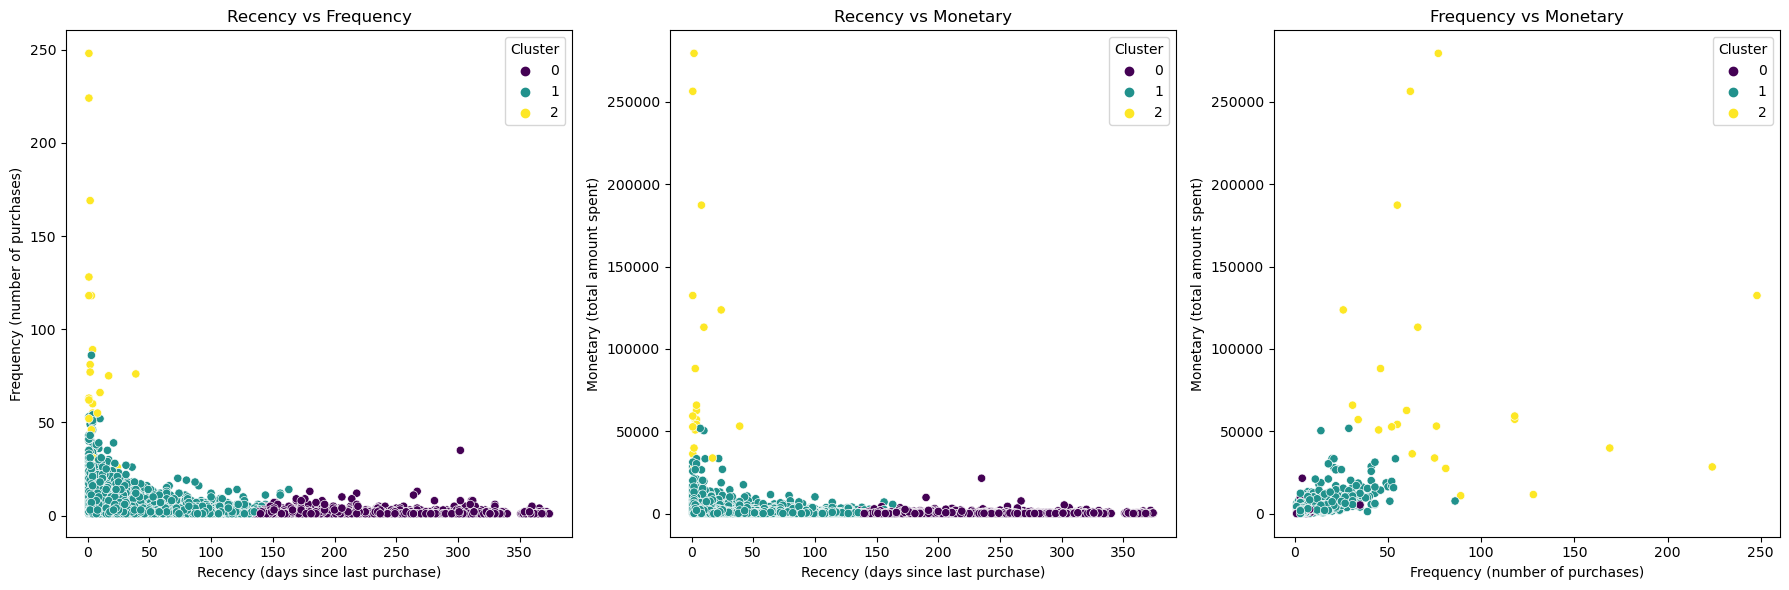

In [31]:
import seaborn as sns

# Visualizing the clusters using scatter plots for RFM variables
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Scatter plot for Recency vs Frequency
sns.scatterplot(x='Recency', y='Frequency', hue='Cluster', data=rfm_data, palette='viridis', ax=axes[0])
axes[0].set_title('Recency vs Frequency')
axes[0].set_xlabel('Recency (days since last purchase)')
axes[0].set_ylabel('Frequency (number of purchases)')

# Scatter plot for Recency vs Monetary
sns.scatterplot(x='Recency', y='Monetary', hue='Cluster', data=rfm_data, palette='viridis', ax=axes[1])
axes[1].set_title('Recency vs Monetary')
axes[1].set_xlabel('Recency (days since last purchase)')
axes[1].set_ylabel('Monetary (total amount spent)')

# Scatter plot for Frequency vs Monetary
sns.scatterplot(x='Frequency', y='Monetary', hue='Cluster', data=rfm_data, palette='viridis', ax=axes[2])
axes[2].set_title('Frequency vs Monetary')
axes[2].set_xlabel('Frequency (number of purchases)')
axes[2].set_ylabel('Monetary (total amount spent)')

plt.tight_layout()
plt.show()


## Steps for Customer Lifetime Value Prediction:

### Define the Time Frame:

In [32]:
# Define the cut-off date (6 months before the last available date)
cut_off_date = online_retail_data_clean['InvoiceDate'].max() - pd.DateOffset(months=6)

# Extract historical data (up to the cut-off date)
historical_data = online_retail_data_clean[online_retail_data_clean['InvoiceDate'] <= cut_off_date]

# Extract future data (6 months following the cut-off date)
future_data = online_retail_data_clean[online_retail_data_clean['InvoiceDate'] > cut_off_date]

# Summary of historical and future data
historical_summary = historical_data['InvoiceDate'].min(), historical_data['InvoiceDate'].max()
future_summary = future_data['InvoiceDate'].min(), future_data['InvoiceDate'].max()

print("Historical Data Summary:", historical_summary)
print("Future Data Summary:", future_summary)


Historical Data Summary: (Timestamp('2010-12-01 08:26:00'), Timestamp('2011-06-09 12:40:00'))
Future Data Summary: (Timestamp('2011-06-09 13:01:00'), Timestamp('2011-12-09 12:50:00'))


In [33]:
# Reference date to calculate recency (one day after the last invoice date in the historical data)
reference_date_historical = historical_data['InvoiceDate'].max() + pd.Timedelta(days=1)

# Calculating Recency, Frequency, Monetary, Average Purchase Value, and Purchase Duration for each customer
features_data = historical_data.groupby('Customer ID').agg({
    'InvoiceDate': [lambda x: (reference_date_historical - x.max()).days, lambda x: (x.max() - x.min()).days],
    'Invoice': 'nunique',
    'TotalAmount': ['sum', 'mean']
}).reset_index()

# Renaming columns
features_data.columns = ['Customer ID', 'Recency', 'Purchase_Duration', 'Frequency', 'Monetary', 'Avg_Purchase_Value']

# Step 2: Calculate Actual CLTV Based on Future Data
actual_cltv = future_data.groupby('Customer ID')['TotalAmount'].sum().reset_index()
actual_cltv.columns = ['Customer ID', 'Actual_CLTV']

# Step 3: Combine Features and Actual CLTV
final_dataset = pd.merge(features_data, actual_cltv, on='Customer ID', how='left').fillna(0)

print(final_dataset.head())

   Customer ID  Recency  Purchase_Duration  Frequency  Monetary  \
0      12346.0      143                  0          2      0.00   
1      12347.0       64                120          3   1823.43   
2      12348.0       66                109          3   1487.24   
3      12350.0      127                  0          1    334.40   
4      12352.0       79                 34          8    601.18   

   Avg_Purchase_Value  Actual_CLTV  
0            0.000000         0.00  
1           21.707500      2486.57  
2           53.115714       310.00  
3           19.670588         0.00  
4           12.524583       944.23  


## Model building

In [34]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

In [35]:
# Splitting the data into training and testing sets (80% training, 20% testing)
X = final_dataset[['Recency', 'Purchase_Duration', 'Frequency', 'Monetary', 'Avg_Purchase_Value']]
y = final_dataset['Actual_CLTV']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Training the Random Forest Regressor
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Making predictions on the testing set
y_pred = model.predict(X_test)

# Evaluating the model
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Printing the evaluation metrics
print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Absolute Error (MAE):", mae)
print("R-squared (R2):", r2)

# Feature Importance
feature_importance = model.feature_importances_
feature_names = X.columns

# Printing the feature importance
print("\nFeature Importance:")
for feature, importance in zip(feature_names, feature_importance):
    print(f"{feature}: {importance * 100:.2f}%")


Root Mean Squared Error (RMSE): 3024.099784916989
Mean Absolute Error (MAE): 964.0292595070422
R-squared (R2): 0.7937316974444438

Feature Importance:
Recency: 1.79%
Purchase_Duration: 1.93%
Frequency: 1.49%
Monetary: 91.76%
Avg_Purchase_Value: 3.02%


## Interpretation:
Monetary: The total amount spent by customers in the historical data is the most important feature, contributing 91.76% to the prediction.

Avg_Purchase_Value: The average purchase value is also significant, contributing 3.02%.

Other Features: Recency, Purchase Duration, and Frequency have lower importance.

## Conclusion:
The model has a good R2 score, indicating a decent fit to the data.

The strong importance of the Monetary feature suggests that past spending behavior is highly predictive of future spending.